In [156]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [244]:
from keras import metrics

In [157]:
import seaborn as sns
import matplotlib as mpl

In [269]:
from tensorflow import keras
from tensorflow.keras import layers

In [180]:
from sklearn.metrics import mean_absolute_error

In [158]:
from sklearn.preprocessing import MinMaxScaler

In [206]:
from sklearn.linear_model import LinearRegression

In [159]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

Загружаем и объединяем данные из Excel

In [131]:
x_bp = pd.read_excel('/content/sample_data/X_bp.xlsx')

In [132]:
x_nup = pd.read_excel('/content/sample_data/X_nup.xlsx')

In [133]:
df = x_bp.merge(x_nup)
df = df.drop(columns='Unnamed: 0')  #удалим первый столбец
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


#Проведем разведочный анализ данных
Построим гистограммы распределния каждой из переменных, а также диаграммы ящиков с усами и попарные графики рассеяния точек

In [134]:
columns_names = df.columns

Соотношение матрица-наполнитель


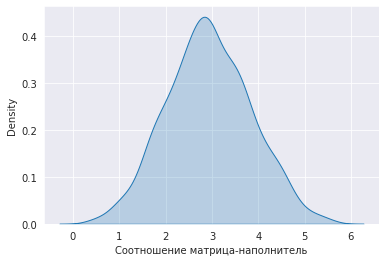

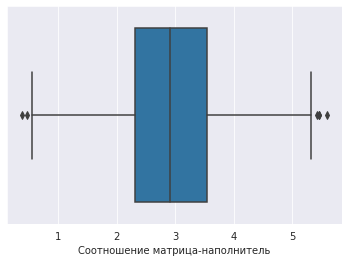

Плотность, кг/м3


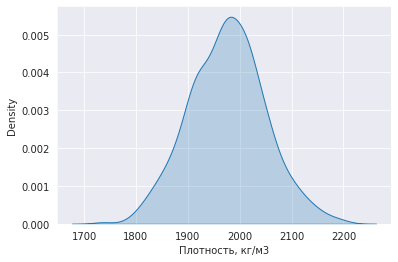

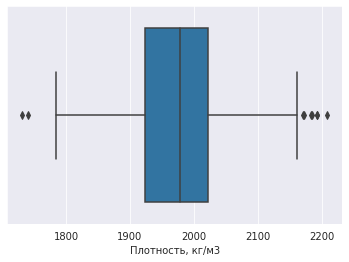

модуль упругости, ГПа


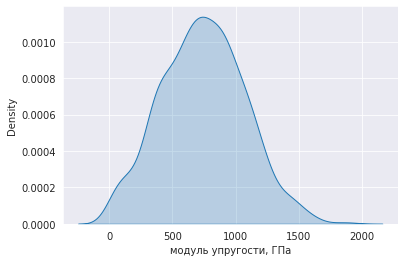

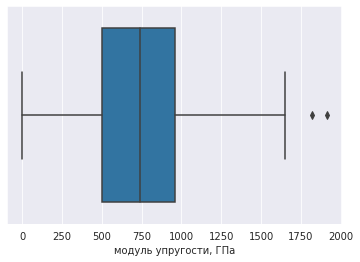

Количество отвердителя, м.%


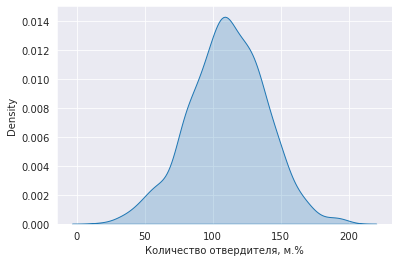

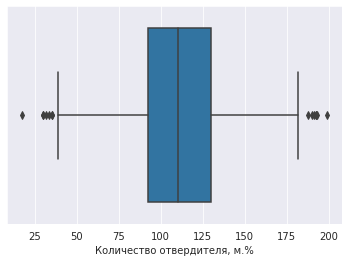

Содержание эпоксидных групп,%_2


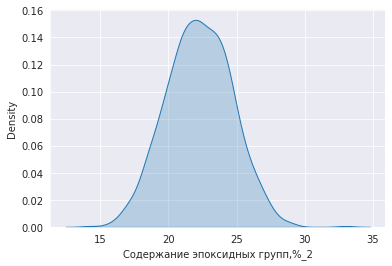

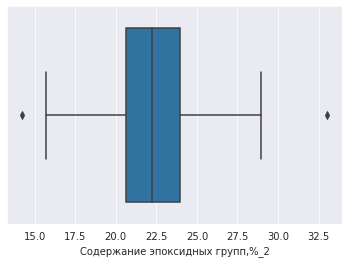

Температура вспышки, С_2


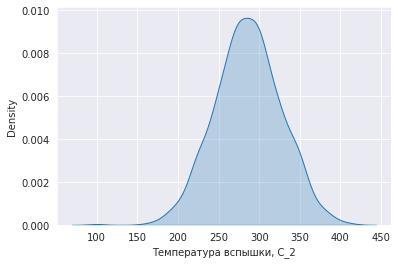

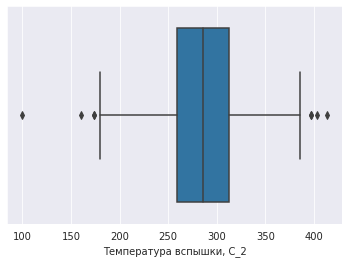

Поверхностная плотность, г/м2


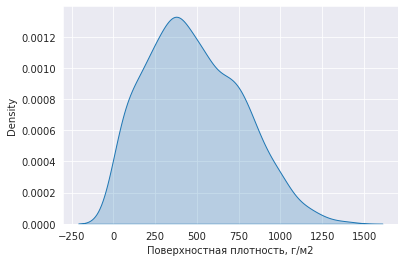

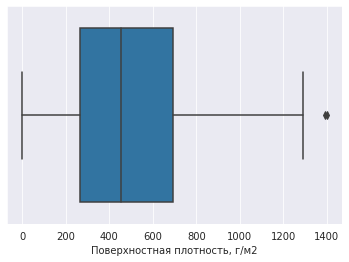

Модуль упругости при растяжении, ГПа


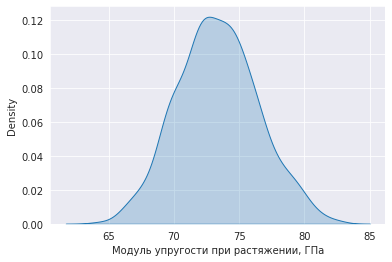

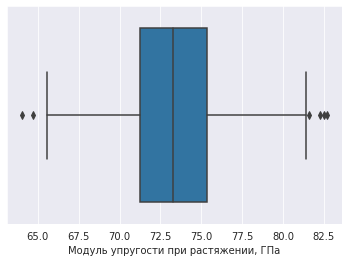

Прочность при растяжении, МПа


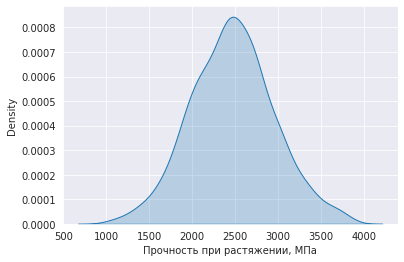

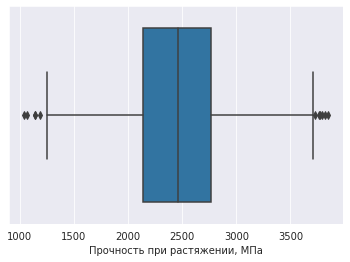

Потребление смолы, г/м2


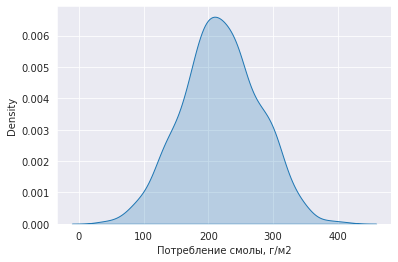

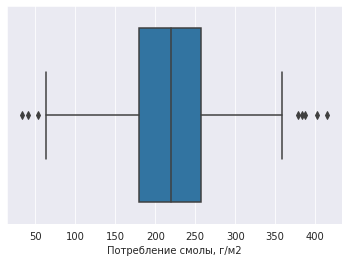

Угол нашивки, град


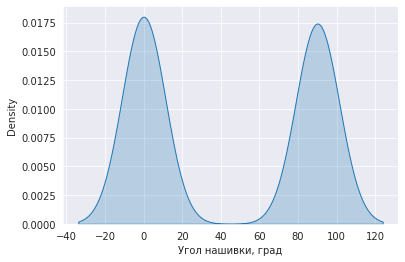

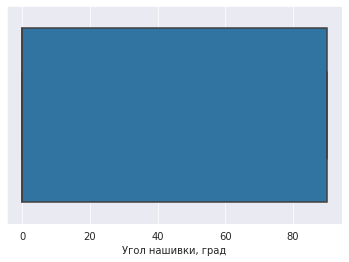

Шаг нашивки


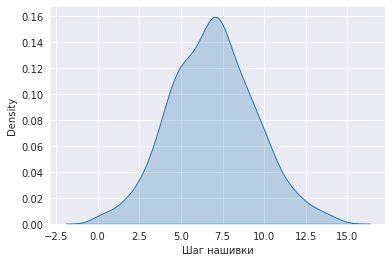

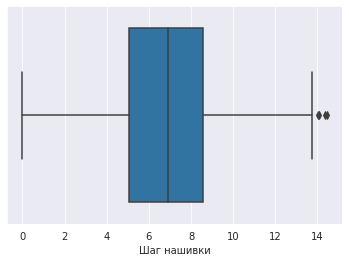

Плотность нашивки


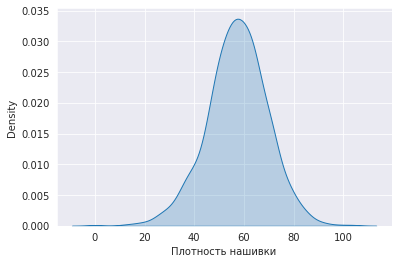

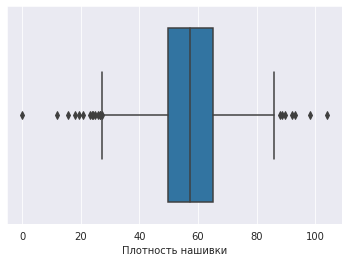

In [94]:
for column_name in columns_names:
    data = df[column_name]

    print(column_name)
    
    #Гистограмма распределения
    sns.kdeplot(data=data, shade=True)
    plt.show()

    #Диаграмма "Ящик с усами"
    sns.boxplot(x=data);
    plt.show()

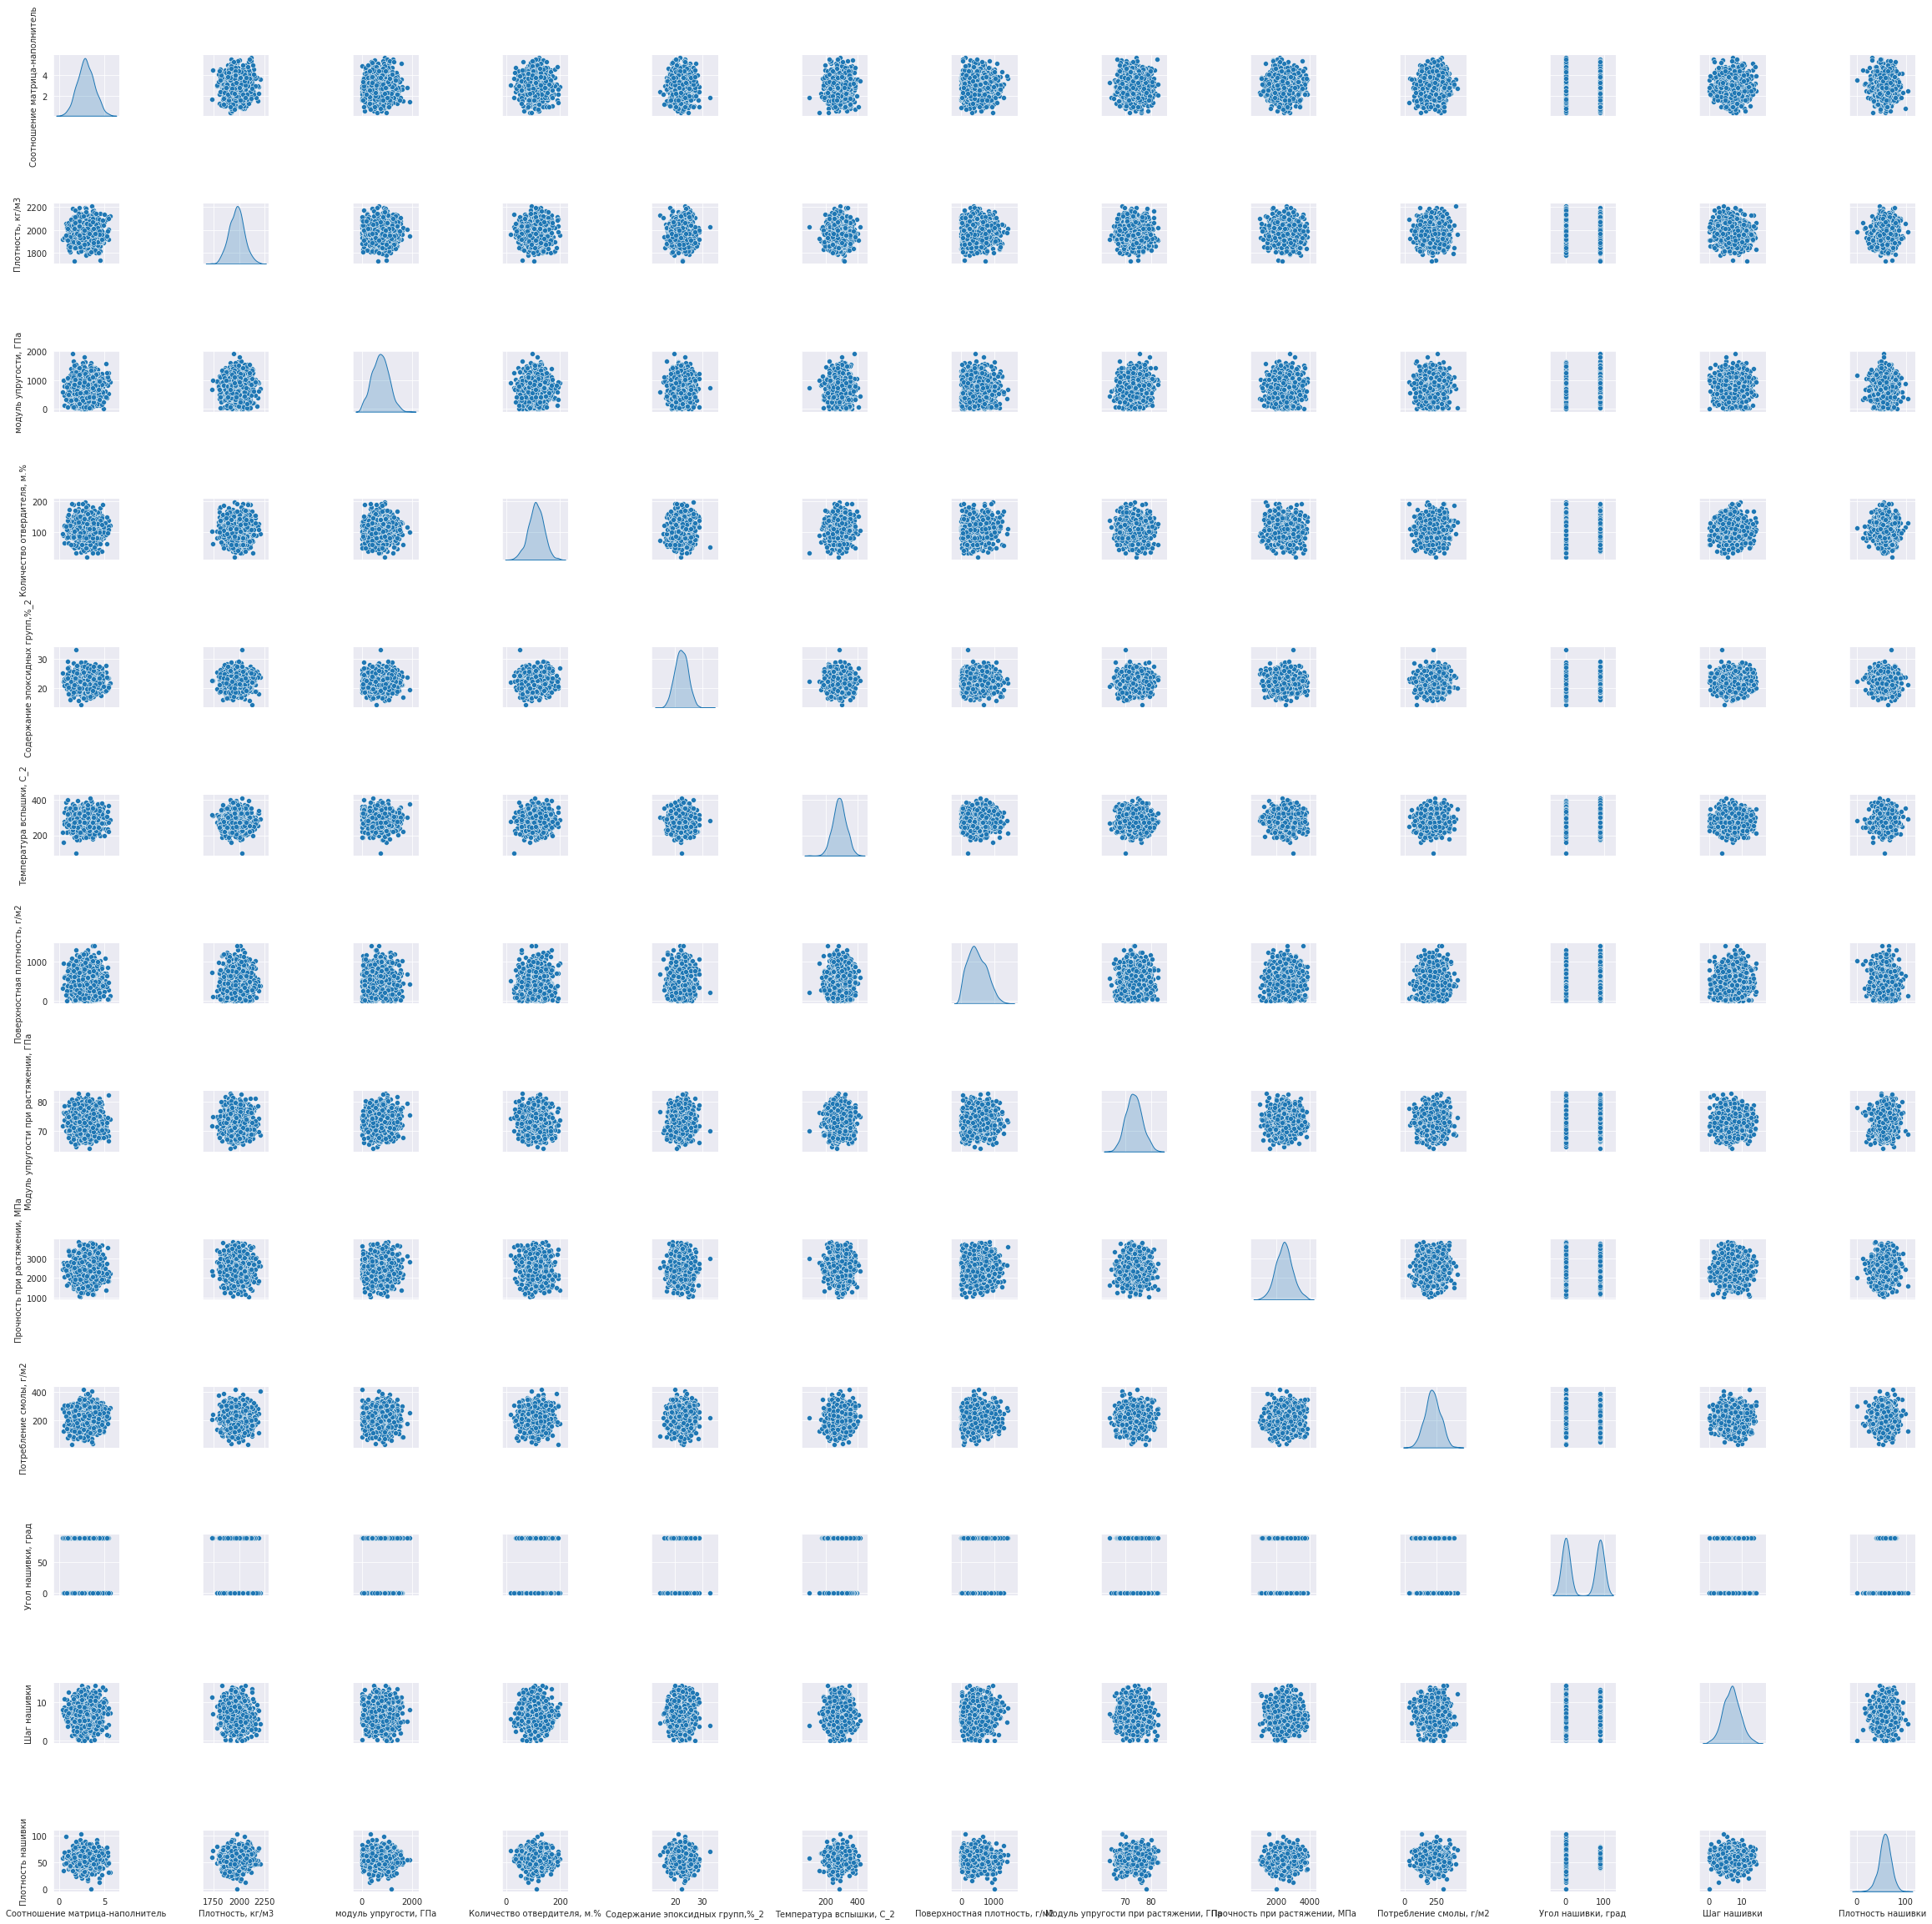

In [95]:
#попарные графики рассеивания
sns.pairplot(df, diag_kind='kde')

In [135]:
#получим среднее и медианное значения данных в колонках
#в целом мы видим близкие друг к другу значения
#проведем предобаботку данных
mean_and_50 = df.describe()
mean_and_50.loc[['mean', '50%']]


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920


# Предобработка данных

In [136]:
#проверяем пропуски в данных
df.isna().sum()
#пропуски отсутствуют

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [137]:
for x in columns_names:
  print(df.loc[:, x])
  break

0       1.857143
1       1.857143
2       1.857143
3       1.857143
4       2.771331
          ...   
1018    2.271346
1019    3.444022
1020    3.280604
1021    3.705351
1022    3.808020
Name: Соотношение матрица-наполнитель, Length: 1023, dtype: float64


In [138]:
#исключаем выбросы данных
for label in columns_names:
    q75,q25 = np.percentile(df.loc[:,label],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[label] < min,label] = np.nan
    df.loc[df[label] > max,label] = np.nan
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [139]:
df = df.dropna()
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [140]:
# после удаления выбросов среднее и медианное значение остались в пределах предыдущих значений
mean_and_50 = df.describe()
mean_and_50.loc[['mean', '50%']]

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
mean,2.925683,1974.040023,738.247627,110.916216,22.209030,286.040414,482.993901,73.305127,2467.488822,217.613374,46.057692,6.915585,57.451895
50%,2.904731,1977.258043,738.736842,111.113175,22.184713,286.024118,457.732246,73.259230,2457.959767,218.388715,90.000000,6.943337,57.584225


In [141]:
#проведем нормализацию данных
mm_scaler = MinMaxScaler()
mm_df = mm_scaler.fit_transform(df)
df_normalized = pd.DataFrame(mm_df, columns=columns_names)
df_normalized

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.289334,0.557156
1,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.335840
2,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.506083
3,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.557156
4,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.727399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.361662,0.444480,0.552781,0.337550,0.333908,0.703458,0.161609,0.475147,0.463043,0.207613,1.0,0.660014,0.336177
932,0.607674,0.704373,0.268550,0.749605,0.294428,0.362087,0.271207,0.464422,0.452087,0.182974,1.0,0.768759,0.450768
933,0.573391,0.498274,0.251612,0.501991,0.623085,0.334063,0.572959,0.578740,0.575296,0.585446,1.0,0.301102,0.687046
934,0.662497,0.748688,0.448724,0.717585,0.267818,0.466417,0.496511,0.535142,0.334513,0.451779,1.0,0.458245,0.527552


# Обучение моделей для прогноза:
# -модуля упругости при растяжении
# -прочности при растяжении

In [165]:
#формирование выборок
input_columns_names = ["Соотношение матрица-наполнитель",
                      "Плотность, кг/м3",
                      "модуль упругости, ГПа",
                      "Количество отвердителя, м.%",
                      "Содержание эпоксидных групп,%_2",
                      "Температура вспышки, С_2",
                      "Поверхностная плотность, г/м2",
                      "Потребление смолы, г/м2",
                      "Угол нашивки, град",
                      "Шаг нашивки",
                      "Плотность нашивки"]

output_columns_names = ["Модуль упругости при растяжении, ГПа",
                       "Прочность при растяжении, МПа"]

x = df_normalized[input_columns_names]
y = df_normalized[output_columns_names]

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [216]:
#построение случайного леса
rf = RandomForestRegressor(n_estimators=200, criterion='mse', max_depth=8, max_features='sqrt')

rf.fit(x_train, y_train)

predictions_rf = rf.predict(x_test)

#mae_rf = np.mean(abs(predictions_rf - y_test)) (если нужны отдельные метрики)

mae_rf = mean_absolute_error(predictions_rf, y_test)
mae_rf

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


0.1553961827415535

In [207]:
#построение линейной регрессии
lr = LinearRegression()

lr.fit(x_train, y_train)

predictions_lr = lr.predict(x_test)

#mae_lr = np.mean(abs(predictions_rf - y_test)) (если нужны отдельные метрики)

mae_lr = mean_absolute_error(predictions_lr, y_test)
mae_lr

0.1562393320435913

In [214]:
#построение KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=7, algorithm='brute')

knr.fit(x_train, y_train)

predictions_knr = knr.predict(x_test)

#mae_lr = np.mean(abs(predictions_rf - y_test)) (если нужны отдельные метрики)

mae_knr = mean_absolute_error(predictions_knr, y_test)
mae_knr

0.162714719747617

In [265]:
#сравним наши модели по метрике МАЕ
mae_df = {'Регрессор': ['RandomForestRegressor', 'LinearRegression', 'KNeighborsRegressor'], 'MAE': [mae_rf, mae_lr, mae_knr]} 

mae_df = pd.DataFrame(mae_df)

In [266]:
mae_df

,Регрессор,MAE
0,RandomForestRegressor,0.155396
1,LinearRegression,0.156239
2,KNeighborsRegressor,0.162715


In [242]:
#проведем поиск гиперпараметров для модели случайного леса
parametrs = { 'n_estimators': [200, 300],
              'max_depth': [9, 15],
              'max_features': ['auto'],
              'criterion': ['mse'] }

In [243]:
grid = GridSearchCV(estimator=rf, param_grid=parametrs, cv=10)
grid.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(criterion='mse', max_depth=8,
                                             max_features='sqrt',
                                             n_estimators=200),
             param_grid={'criterion': ['mse'], 'max_depth': [9, 15],
                         'max_features': ['auto'], 'n_estimators': [200, 300]})

In [245]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 200}

In [252]:
#подставим значения в нашу модель случайного леса
rf_grid = RandomForestRegressor(n_estimators=200, criterion='mse', max_depth=9, max_features='auto')

rf_grid.fit(x_train, y_train)

predictions_rf_grid = rf_grid.predict(x_test)

mae_rf_grid = mean_absolute_error(predictions_rf_grid, y_test)
mae_rf_grid

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


0.15643764505779606

In [267]:
new_row_in_mae_df = {'Регрессор': 'RandomForestRegressor_GridSearchCV', 'MAE': mae_rf_grid} 

mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)

In [268]:
#поиск гипермараметров не дал улучшений для уже имеющейся модели RandomForestRegressor
#требуется указывать больше вариаций параметров при работе с GridSearchCV (мой ноутбук не осилил больше параметров)
mae_df

,Регрессор,MAE
0,RandomForestRegressor,0.155396
1,LinearRegression,0.156239
2,KNeighborsRegressor,0.162715
3,RandomForestRegressor_GridSearchCV,0.156438


# Создание нейронной сети для рекомендации параметра Матрица наполнитель

In [283]:
#создание выборки
#формирование выборок
input_columns_names = ["Модуль упругости при растяжении, ГПа",
                      "Прочность при растяжении, МПа",
                      "Плотность, кг/м3",
                      "модуль упругости, ГПа",
                      "Количество отвердителя, м.%",
                      "Содержание эпоксидных групп,%_2",
                      "Температура вспышки, С_2",
                      "Поверхностная плотность, г/м2",
                      "Потребление смолы, г/м2",
                      "Угол нашивки, град",
                      "Шаг нашивки",
                      "Плотность нашивки"]

output_columns_names = ["Соотношение матрица-наполнитель"]
                    
x = df_normalized[input_columns_names]
y = df_normalized[output_columns_names]

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [297]:
#создание модели
model = keras.Sequential([
    layers.Dense(12, activation = 'relu', input_dim=12),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1),
])

model.compile(optimizer='adam', 
              loss='mse', 
              metrics='mae')

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 12)                156       
                                                                 
 dense_23 (Dense)            (None, 128)               1664      
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 14,301
Trainable params: 14,301
Non-trainable params: 0
_________________________________________________________________


In [298]:
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.0695 - mae: 0.2087
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0363 - mae: 0.1541
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0358 - mae: 0.1532
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0365 - mae: 0.1549
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0357 - mae: 0.1523
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0355 - mae: 0.1522
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0349 - mae: 0.1518
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0346 - mae: 0.1509
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0346 - mae: 0.1508
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0350 - mae: 0.1515
Epoch 11/100
24/24 [==============================] - 0s 2m

In [301]:
#результат работы нейронной сети на тестовой выборке
score = model.evaluate(x_test, y_test, verbose=0)
print('mse:', score[0])
print('mae', score[1])

mse: 0.0497710146009922
mae 0.1782580018043518


In [329]:
#интересно требуется ли делать обратное преобразования MinMaxScaler, посмотрим как будет работать модель в Flask

In [330]:
new_row_in_mae_df = {'Регрессор': 'Нейронная сеть', 'MAE': score[1]} 

mae_df = mae_df.append(new_row_in_mae_df, ignore_index=True)

In [331]:
#результат сравнительного анализа МАЕ построенных моделей
mae_df

,Регрессор,MAE
0,RandomForestRegressor,0.155396
1,LinearRegression,0.156239
2,KNeighborsRegressor,0.162715
3,RandomForestRegressor_GridSearchCV,0.156438
4,Нейронная сеть,0.178258
